# Review an algorithm using jupyter lab

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os
%matplotlib inline     
sns.set(color_codes=True)

In [20]:
%pwd

'/home/shoff/Projekte/Automatically-Estimating-Task-Durations/Scripts/output'

In [21]:
df = pd.read_csv("./A002_1_swearchiv2020_swearchiv2020.csv")
df.tail(5)

,Name,Column,Color,Time spent,DurationInSeconds,EstimateInSeconds
1018,"Monitoring: Zuordnung Moni (Sebastian Hoppe), ...",12.202,White,0.067,241.2,6585.716129
1019,Personal / Recruiting: weitere Bewerbertermine...,12.202,White,0.607,2185.2,6585.716129
1020,Ticketsystem: Werden für die Anwesenheiten all...,12.202,White,2.319,8348.4,6585.716129
1021,Personal / Recruiting: Dateien einpflegen (Dan...,12.202,White,0.069,248.4,6585.716129
1022,IT-Service: Ticketsystem einrichten 28.12.2020...,12.202,White,0.575,2070.0,6585.716129


In [22]:
df.dtypes

Name                  object
Column               float64
Color                 object
Time spent           float64
DurationInSeconds    float64
EstimateInSeconds    float64
dtype: object

In [23]:
df = df.rename(columns={"Color":"TaskType"})
df.shape


(1023, 6)

In [24]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [25]:
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

In [26]:
df = df.drop_duplicates()

In [27]:
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

In [28]:
print(df.isnull().sum())

Name                 0
Column               0
TaskType             0
Time spent           0
DurationInSeconds    0
EstimateInSeconds    0
dtype: int64


In [29]:
df.dropna()
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

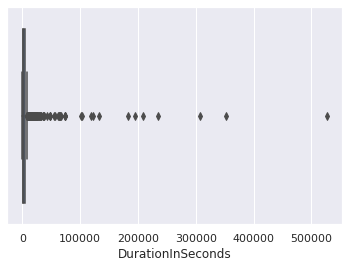

In [30]:
sns.boxplot(x=df["DurationInSeconds"])

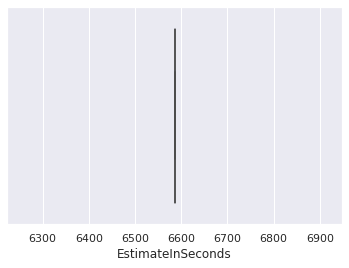

In [31]:
sns.boxplot(x=df["EstimateInSeconds"])

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Column                  3.0000
Time spent              0.8935
DurationInSeconds    3216.6000
EstimateInSeconds       0.0000
dtype: float64


In [33]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/tmp/ipykernel_5953/4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(887, 6)

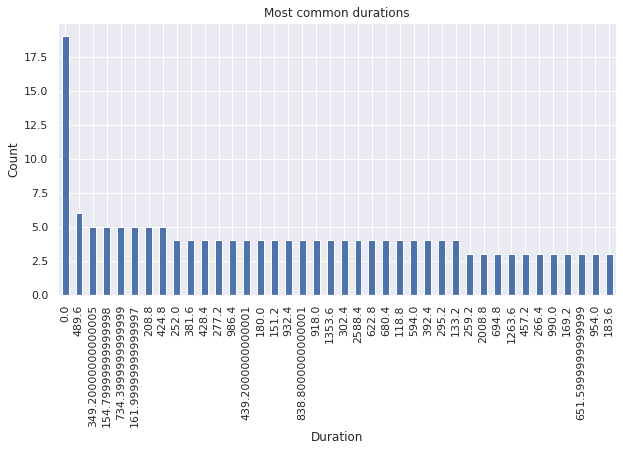

In [34]:
df.DurationInSeconds.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Most common durations")
plt.ylabel('Count')
plt.xlabel('Duration');

,Column,Time spent,DurationInSeconds,EstimateInSeconds
Column,1.000000,-0.059331,-0.059331,NaN
Time spent,-0.059331,1.000000,1.000000,NaN
DurationInSeconds,-0.059331,1.000000,1.000000,NaN
EstimateInSeconds,NaN,NaN,NaN,NaN


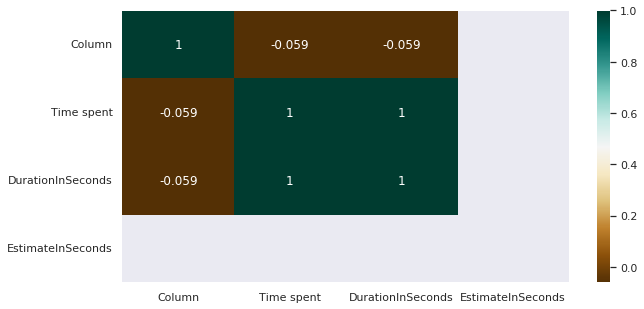

In [35]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

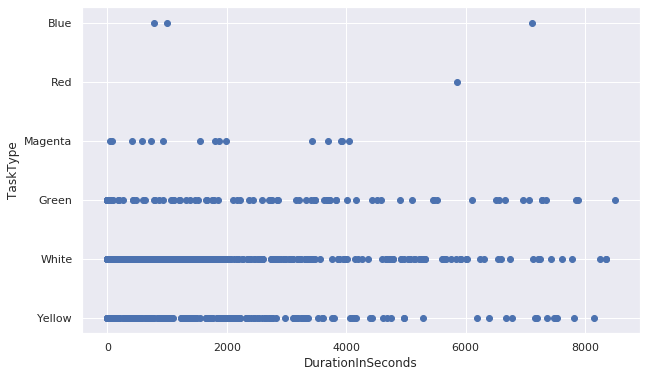

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['DurationInSeconds'], df['TaskType'])
ax.set_xlabel('DurationInSeconds')
ax.set_ylabel('TaskType')
plt.show()

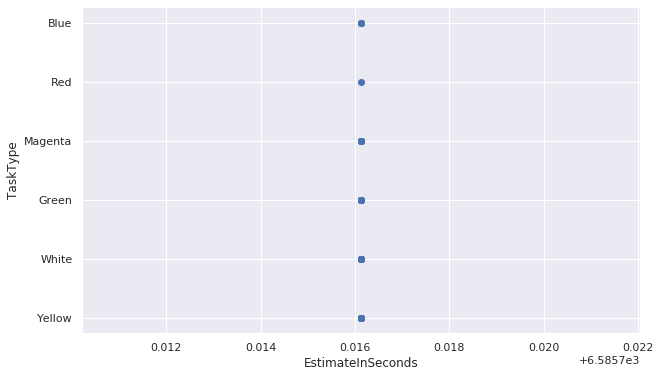

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['EstimateInSeconds'], df['TaskType'])
ax.set_xlabel('EstimateInSeconds')
ax.set_ylabel('TaskType')
plt.show()

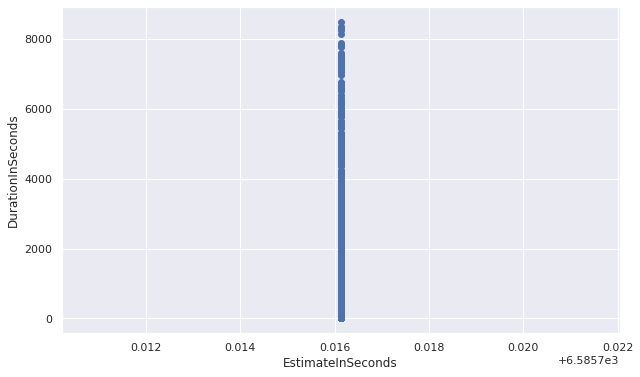

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['EstimateInSeconds'], df['DurationInSeconds'])
ax.set_xlabel('EstimateInSeconds')
ax.set_ylabel('DurationInSeconds')
plt.show()